<a href="https://colab.research.google.com/github/Pgupta1996/Cardiovascular_Risk_Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cardiovascular Risk Prediction**

**1. Problem Description**

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future Coronary Heart Disease (CHD).

**2. Data Description**

The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.Variables Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

**Attribute Information:**

**Demographic**
###Sex : male or female("M" or "F")
### Age: Age of the patient (Continuous)

**Behavioral**

### is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
### Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(Continuous)
### BP Meds: whether or not the patient was on blood pressure medication (Nominal)
### Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
### Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
### Diabetes: whether or not the patient had diabetes (Nominal)
### Tot Chol: total cholesterol level (Continuous)
### Sys BP: systolic blood pressure (Continuous)
### BMI: Body Mass Index (Continuous)
### Heart Rate: heart rate (Continuous)
### Glucose: glucose level (Continuous)

**Predict variable (desired target)**

### 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

**3. Import Liabaries And Dataset**

In [1]:
# Install eli5 for model explainability
!pip install eli5
import eli5 as eli

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 216 kB 4.2 MB/s 
     |████████████████████████████████| 133 kB 47.6 MB/s 
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107748 sha256=d78b3cd660119724681424989505376ddcfc1883d4d64ed637d67dbe775b4746
  Stored in directory: /root/.cache/pip/wheels/cc/3c/96/3ead31a8e6c20fc0f1a707fde2e05d49a80b1b4b30096573be
Successfully built eli5
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires Jinja2<3.0,>=2.10.1, but you have jinja2 3.1.2 which is incompatible.


In [2]:
# Importing the libraries for process data
import pandas as pd
import numpy as np
from numpy import math

# Import libraries for ploting data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split # Require to prepare train and test data set
from imblearn.over_sampling import SMOTE # SMOTE technique for ovecome class imbalance problem

In [4]:
# Import CSV file from drive 
dataset=pd.read_csv('/content/data_cardiovascular_risk.csv')

In [5]:
dataset.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
dataset.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [12]:
dataset.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [10]:
dataset.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [17]:
dataset.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

**Conclusion of Statistics of Data**

1. The dataset provides the patient's information. It includes over 3390 records and 17 attributes. 
2. Variables Each attribute is a potential risk factor. 
3. There are both demographic, behavioural, and medical risk factors.
4. Some Columns are contain null values (Education, cigsPerDay , BPMeds , BMI, heartrate, glucose)
5. Data contained in every column are in the required datatype Out of 17 columns, the Number 6 Columns contain the numeric data and 11 columns contain categorical data.
6. Our Dependent/Target variable is "TenYearCHD", rest are Independent variable
7. Our target variable contains the categorical data so our approach will be a classification model of machine learning

**4. Dataset Cleaning and Remove Null Value**

**4.1 education and id column**

1. Id columns do not contain any useful information so it's not 
required for our analysis.
2. As we know that heart disease has relation to education, so the education column is again not required in analysis.

So let's drop both id and education columns

In [18]:
# droping the id and education column
dataset.drop(columns=['id','education'],inplace=True)

In [19]:
# Make function to plot distribution chart
def dist_chart(x):
  plt.figure(figsize = (20,40)) #defining chart size
  plt.subplot(9,2,1)
  sns.distplot(x)   # Plot dist plot
  plt.axvline(x.mean(), color='green', linestyle='dashed', linewidth=2) # plot mean line
  plt.axvline(x.median(), color='blue', linestyle='dashed', linewidth=2) # plot median line
  plt.subplot(9,2,2) 
  sns.boxplot(x) # Plot box chart
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


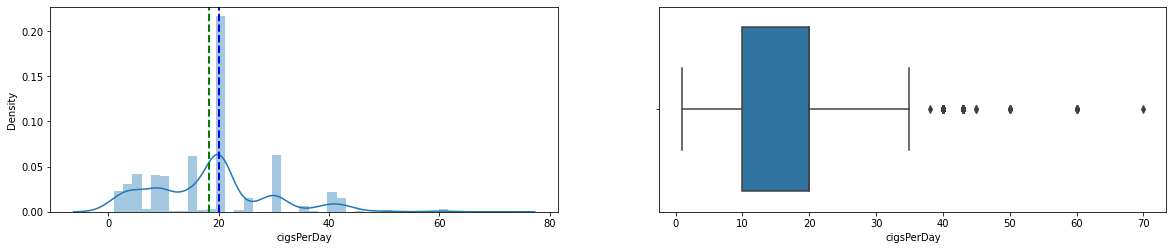

In [20]:
# Plot the Data distribution chart for is_smoking column
dist_chart(dataset[dataset['is_smoking']=='YES'].cigsPerDay) # Call Chart function

**Conclusion**

1. From the chart, it's observed that Data is normally distributed.
2. Mean and median values are close to each other.
3. From the box plot we can see that there are some outliers in data so for the safe side we'll replace null values with median.

In [32]:
# Fill the null values with median
dataset['cigsPerDay'].fillna(dataset[dataset['is_smoking']=='YES'].cigsPerDay.mean(),inplace=True)

In [33]:

dataset[dataset['cigsPerDay'].isnull()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**4.2 BPMeds**

In [28]:
#Finding the unique values in columns
dataset['BPMeds'].unique()

array([ 0., nan,  1.])

In [29]:
# This is categorical columns (as it only contains 0 & 1) null value will be replace with the mode of the dataset.
dataset['BPMeds'].fillna(float(dataset['BPMeds'].mode()),inplace=True)

In [31]:
#Verify that filling done.
dataset[dataset['BPMeds'].isnull()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**4.3 totchol**

In [34]:
#Find the unique values in columns
dataset['totChol'].unique()

array([221., 212., 250., 233., 241., 272., 238., 295., 220., 326.,  nan,
       210., 213., 227., 188., 240., 257., 267., 232., 199., 175., 164.,
       226., 248., 245., 279., 273., 252., 198., 266., 216., 237., 193.,
       293., 180., 206., 215., 208., 262., 270., 292., 346., 202., 340.,
       334., 351., 235., 243., 196., 275., 186., 190., 268., 234., 264.,
       156., 260., 225., 183., 246., 174., 288., 254., 150., 211., 161.,
       274., 214., 195., 165., 302., 265., 251., 205., 209., 258., 222.,
       247., 189., 173., 281., 382., 181., 200., 244., 218., 261., 229.,
       291., 312., 170., 176., 290., 204., 239., 162., 314., 194., 271.,
       313., 305., 285., 169., 224., 201., 185., 307., 179., 280., 219.,
       391., 300., 253., 345., 278., 282., 255., 191., 439., 327., 287.,
       236., 332., 207., 230., 155., 335., 325., 223., 231., 197., 184.,
       310., 157., 228., 166., 303., 320., 163., 259., 178., 137., 217.,
       342., 328., 168., 167., 299., 304., 152., 28

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


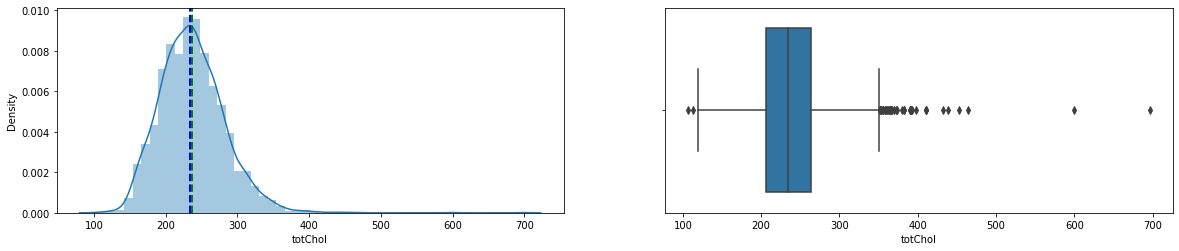

In [35]:
# Plot the Data distribution chart
dist_chart(dataset['totChol'])

**Conclusion**

1. From the chart, it's observed that Data is normally distributed.
2. Mean and median values are close to each other.
3. From the box plot we can see that there are some outliers in data. 

So, for the safe side we'll replace null values with mean.

In [36]:
# Fill the null values with means
dataset['totChol'].fillna(dataset['totChol'].mean(),inplace=True)

In [37]:
#Verify that filling done.
dataset[dataset['totChol'].isnull()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**4.5 BMI**

In [38]:
# Find the unique values in columns
dataset['BMI'].unique()

array([  nan, 29.77, 20.35, ..., 29.19, 19.71, 31.09])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


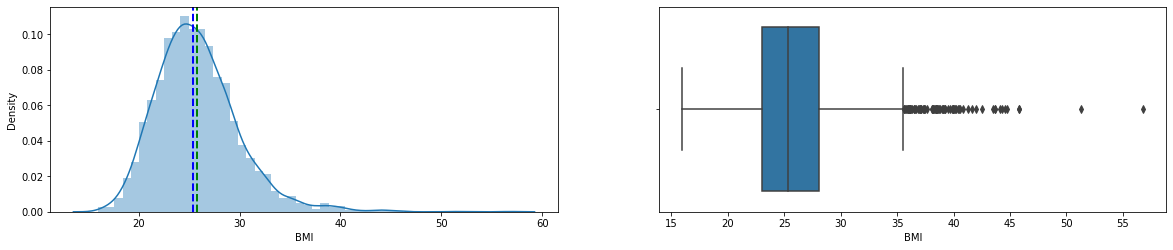

In [39]:
# Plot the Data distribution chart.
dist_chart(dataset['BMI'])

**Conclusion**

1. From the chart, it's observed that Data is normally distributed.
2. Mean and median values are close to each other.
3. From the box plot we can see that there are some outliers in data. 

So, for the safe side we'll replace null values with mean.

In [40]:
# Fill the null values with means.
dataset['BMI'].fillna(dataset['BMI'].mean(),inplace=True)
#Verify that filling done.
dataset[dataset['BMI'].isnull()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**4.5 glucose**

In [41]:
#Find the unique values.
dataset['glucose'].unique()

array([ 80.,  75.,  94.,  77.,  65.,  79.,  63.,  nan,  87.,  67.,  85.,
       132.,  76., 100.,  70.,  60.,  73.,  81.,  68.,  66.,  78.,  96.,
        72.,  61.,  69., 103.,  92., 105.,  93.,  89.,  64.,  83., 170.,
        57.,  58.,  86.,  99., 107.,  55.,  90., 177.,  71., 118.,  59.,
        74.,  84.,  82.,  95., 120., 173.,  91., 102., 163.,  88.,  62.,
       205.,  97., 115.,  98., 268., 104., 137., 106., 348., 110., 122.,
       108., 255., 140., 124., 244., 294., 112., 113., 254., 116.,  52.,
        50., 114., 127.,  56., 135.,  45., 206.,  53., 101., 117., 126.,
       131., 394., 123., 270., 320., 129., 142.,  54., 235.,  40., 150.,
       136., 191.,  44., 119., 109., 121.,  43., 256., 145.,  47., 297.,
       166., 172.,  48., 111., 215., 216., 368., 155., 148., 147., 223.,
       225., 332., 210., 186., 386., 248., 193., 125., 167., 183., 260.,
       274.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


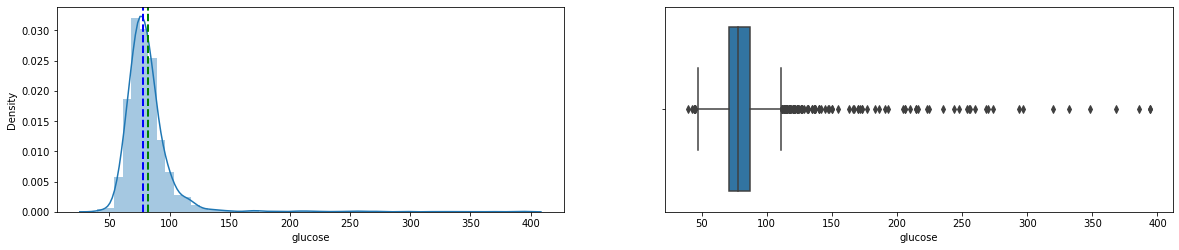

In [42]:
# Plot the Data distribution chart.
dist_chart(dataset['glucose'])

**Conclusion**

1. From the chart, it's observed that Data is positively skewed.
2. Mean and median values are close to each other.
3. From the box plot we can see that there are some outliers in data. 

So, for the safe side we'll replace null values with mean.

In [43]:
# Fill the null values with means
dataset['glucose'].fillna(dataset['glucose'].mean(),inplace=True)
#Verify that filling done.
dataset[dataset['glucose'].isnull()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


**4.6 heartRate**

In [44]:
#Find the unique value.
dataset['heartRate'].unique()

array([ 90.,  72.,  88.,  68.,  70.,  85.,  75.,  60.,  86.,  80.,  74.,
       100.,  89.,  92.,  82.,  87.,  58.,  79.,  78.,  76.,  69.,  59.,
        67.,  50.,  73.,  66.,  65.,  62., 110.,  83.,  64.,  63.,  96.,
        55.,  77., 112.,  84.,  95.,  61., 120.,  93.,  94., 104.,  52.,
        56.,  98., 106.,  48.,  54.,  81., 115., 103.,  71., 107.,  57.,
       143.,  91.,  45., 102., 108.,  53.,  47.,  nan, 125., 105., 122.,
        51., 140.,  97.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


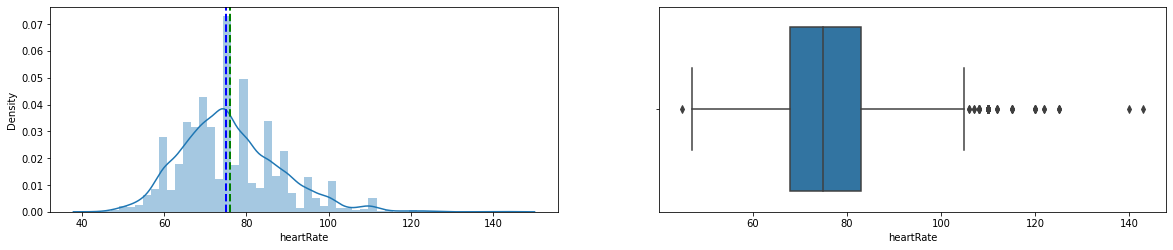

In [45]:
# Plot the Data distribution chart.
dist_chart(dataset['heartRate'])

**Conclusion**

1. From the chart, it's observed that Data is nearly positively skewed.
2. Mean and median values are close to each other.
3. From the box plot we can see that there are some outliers in data. 

So, for the safe side we'll replace null values with mean.

In [46]:
# Fill the null values with means.
dataset['heartRate'].fillna(dataset['heartRate'].mean(),inplace=True)
#Verify that filling done.
dataset[dataset['heartRate'].isna()]

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD


In [47]:
#checking the null values in the dataset.
dataset.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64